In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import seaborn as sns

In [2]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\test.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\sample_submission.csv')

In [3]:
# 2016년 4월 16일부터 29일까지의 2주간의 sales 데이터를 2016년 4월 9일~15일 일주일간의 sales의 데이터에서 그 요일에 해당하는 데이터로 대체할거야. 
# 데이터들은 store_nbr, family, day_of_week 값이 같은 경우에만 대체해야 해. 
# 그런데 transactions에 비례해서 sales의 값을 정할거야. 


import pandas as pd
import numpy as np

temp['date'] = pd.to_datetime(temp['date'])

# 필터링할 날짜 범위 설정
target_start_date = "2016-04-16"
target_end_date = "2016-04-29"
source_start_date = "2016-04-09"
source_end_date = "2016-04-15"

# 타겟 데이터와 소스 데이터 필터링
target_temp = temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)]
source_temp = temp[(temp['date'] >= source_start_date) & (temp['date'] <= source_end_date)]

# 데이터 대체 함수
def replace_sales(target_temp, source_temp):
    new_sales = []
    
    for index, row in target_temp.iterrows():
        matching_source_temp = source_temp[
            (source_temp['store_nbr'] == row['store_nbr']) &
            (source_temp['family'] == row['family']) &
            (source_temp['day_of_week'] == row['day_of_week'])
        ]
        
        if not matching_source_temp.empty:
            source_row = matching_source_temp.iloc[0]
            
            # 트랜잭션 비례로 sales 계산
            transaction_ratio = row['transactions'] / source_row['transactions']
            adjusted_sales = source_row['sales'] * transaction_ratio
            new_sales.append(adjusted_sales)
        else:
            new_sales.append(row['sales'])  # 매칭되는 소스 데이터가 없을 경우 원래 sales 값을 사용
    
    target_temp['sales'] = new_sales
    return target_temp

# 타겟 데이터를 대체 데이터로 변경
temp.loc[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date), 'sales'] = replace_sales(target_temp, source_temp)['sales']

print(temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)])


C:\Users\user\AppData\Local\Temp\ipykernel_30092\2354868981.py:36: RuntimeWarning: invalid value encountered in scalar divide
  transaction_ratio = row['transactions'] / source_row['transactions']


              date  store_nbr                      family        sales  \
39534   2016-04-16          1                  AUTOMOTIVE     4.175411   
39535   2016-04-16          1                   BABY CARE     0.000000   
39536   2016-04-16          1                      BEAUTY     2.087706   
39537   2016-04-16          1                   BEVERAGES  2324.660141   
39538   2016-04-16          1                       BOOKS     0.000000   
...            ...        ...                         ...          ...   
2985307 2016-04-29          9                     POULTRY   402.340777   
2985308 2016-04-29          9              PREPARED FOODS    62.948896   
2985309 2016-04-29          9                     PRODUCE   974.987140   
2985310 2016-04-29          9  SCHOOL AND OFFICE SUPPLIES     4.936394   
2985311 2016-04-29          9                     SEAFOOD    17.503465   

         onpromotion   city      state type  cluster  transactions  ...  year  \
39534              0  Quito  P

C:\Users\user\AppData\Local\Temp\ipykernel_30092\2354868981.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_temp['sales'] = new_sales


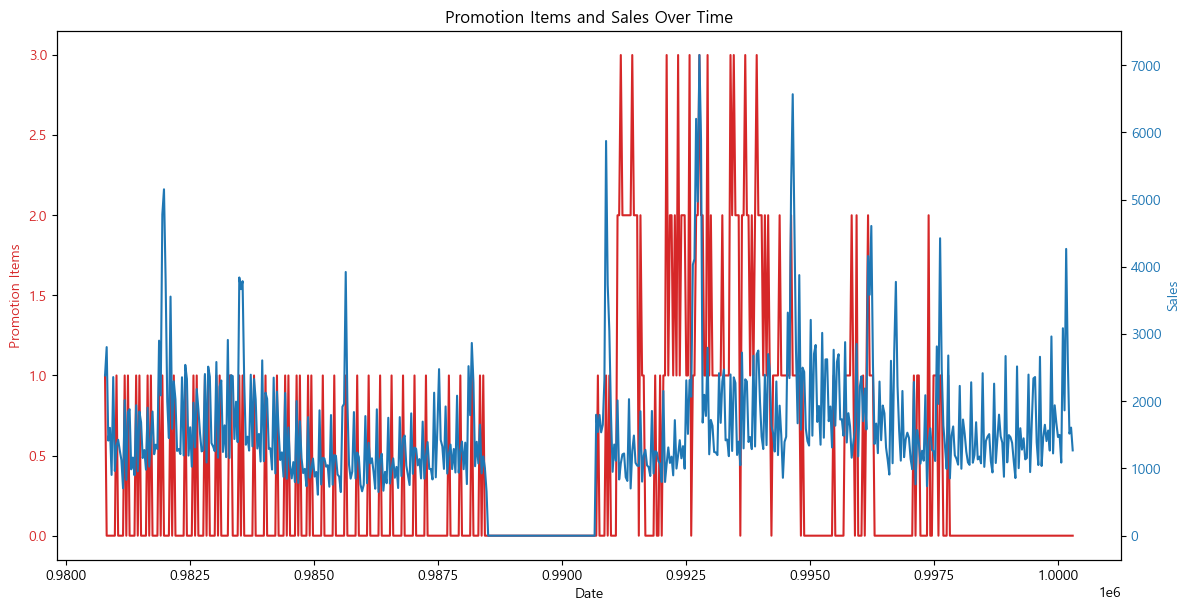

Correlation between promotion items and sales: 0.34582557351022325


In [5]:
import pandas as pd

# 예시 데이터 로드 GROCERY I           HOME APPLIANCES BEVERAGES
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion', 'transactions','day_of_week']]
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion', 'onpromotion_lag1', 'onpromotion_lag2', 'transactions','day_of_week']]
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='BEVERAGES')][['date', 'sales', 'onpromotion_lag1', 'transactions','day_of_week']]
data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion_lag1', 'transactions','day_of_week']]

import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Promotion Items', color=color)
ax1.plot(data.index, data['onpromotion_lag1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Sales', color=color)
ax2.plot(data.index, data['sales'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Promotion Items and Sales Over Time')
plt.show()


# 상관분석
correlation = data['onpromotion_lag1'].corr(data['sales'])
print(f'Correlation between promotion items and sales: {correlation}')


In [6]:
# Convert day_of_week to a categorical variable
data['day_of_week'] = data['day_of_week'].astype('category')

In [ ]:
# Create dummy variables for the day_of_week column
data = pd.get_dummies(data, columns=['day_of_week'])

In [9]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [10]:
data['slope7'] = data['sales'].rolling(7).apply(get_slope, raw=True)
data['std7'] = data['sales'].rolling(7).std(raw=True)
data['mean7'] = data['sales'].rolling(7).mean(raw=True)
data['skew7'] = data['sales'].rolling(7).skew()
data['kurt7'] = data['sales'].rolling(7).kurt()
data['min7'] = data['sales'].rolling(7).min()
data['max7'] = data['sales'].rolling(7).max()

data['slope14'] = data['sales'].rolling(14).apply(get_slope, raw=True)
data['std14'] = data['sales'].rolling(14).std(raw=True)
data['mean14'] = data['sales'].rolling(14).mean(raw=True)
data['skew14'] = data['sales'].rolling(14).skew()
data['kurt14'] = data['sales'].rolling(14).kurt()
data['min14'] = data['sales'].rolling(14).min()
data['max14'] = data['sales'].rolling(14).max()

C:\Users\user\AppData\Local\Temp\ipykernel_30092\787891233.py:2: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std7'] = data['sales'].rolling(7).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_30092\787891233.py:3: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['mean7'] = data['sales'].rolling(7).mean(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_30092\787891233.py:10: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std14'] = data['sales'].rolling(14).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_30092\787891233.py:11: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the r

In [11]:
data.dropna(inplace=True)

In [12]:
#X = data[['onpromotion', 'transactions', 'slope7' ,'std7','mean7','skew7','kurt7','min7','max7','slope14' ,'std14','mean14','skew14','kurt14','min14','max14'] + [col for col in data.columns if 'day_of_week' in col]]
X = data[['onpromotion_lag1', 'transactions', 'slope7' ,'std7','mean7','skew7','kurt7','min7','max7','slope14' ,'std14','mean14','skew14','kurt14','min14','max14'] + [col for col in data.columns if 'day_of_week' in col]]

y = data['sales']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

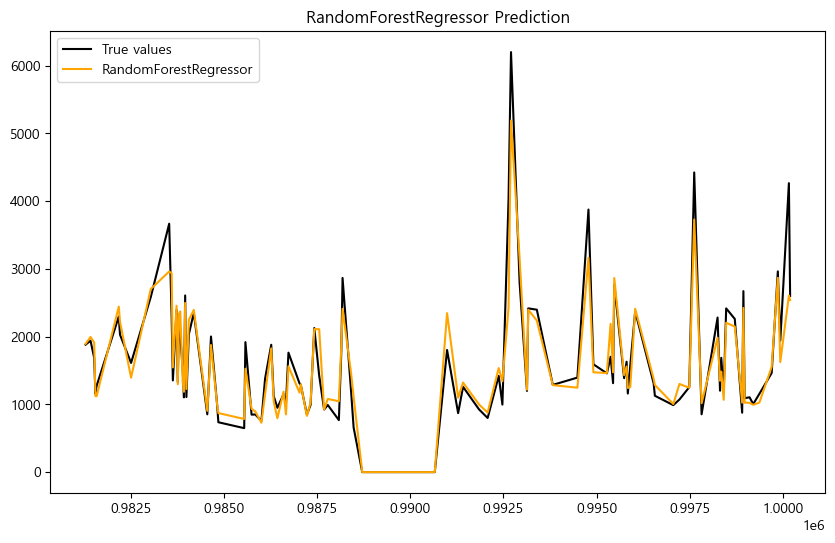

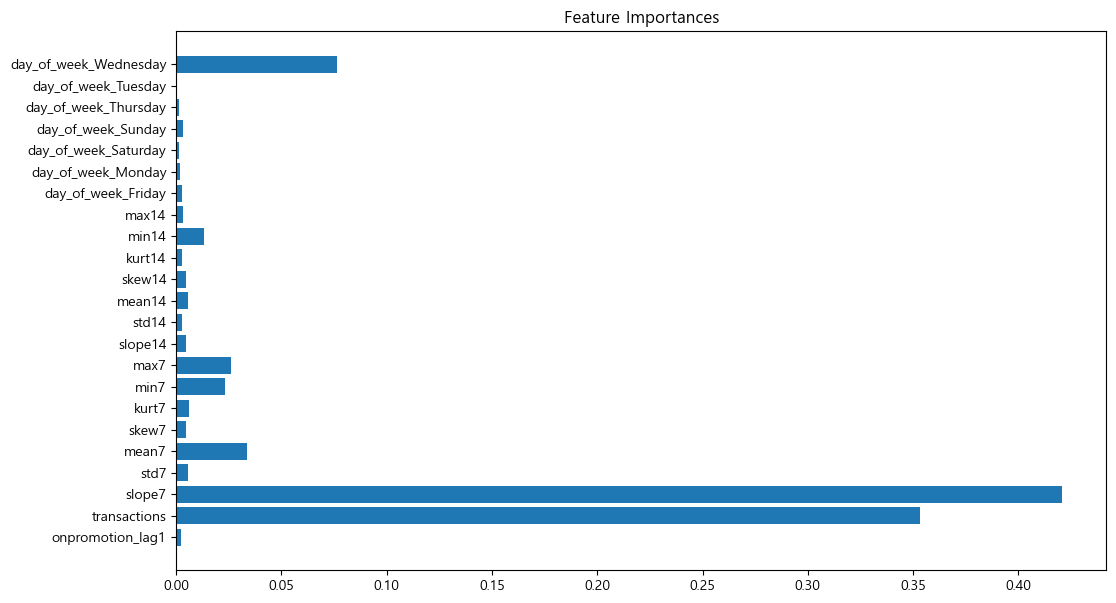

RandomForestRegressor MSE: 101752.14067412277
RandomForestRegressor R2: 0.9043285484292174
RandomForestRegressor RMSLE: 0.14393934437339734


In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# 시각화를 위해 테스트 데이터와 예측 데이터를 데이터프레임으로 변환
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}, index=y_test.index)

# 인덱스를 기준으로 정렬
results.sort_index(inplace=True)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], color="black", label="True values")
plt.plot(results.index, results['Predicted'], color="orange", label="RandomForestRegressor")
plt.legend(loc="upper left")
plt.title('RandomForestRegressor Prediction')
plt.show()

# feature importance for decision tree
plt.figure(figsize=(12, 7))
plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Feature Importances')
plt.show()

# RMSLE 계산 함수 정의
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmsle_test = root_mean_squared_log_error(y_test, y_pred_rf)

print(f'RandomForestRegressor MSE: {mse_rf}')
print(f'RandomForestRegressor R2: {r2_rf}')
print(f"RandomForestRegressor RMSLE: {rmsle_test}")
